In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
corn_and_olives_dataset = pd.DataFrame.from_dict({
        'shape': ['round', 'oval'],
        'color': ['yellow', 'green'],
        'ingredient_type': ['corn', 'olives']
    }
)

In [3]:
corn_and_olives_dataset

,shape,color,ingredient_type
0,round,yellow,corn
1,oval,green,olives


In [4]:
corn_and_olives_dataset['c_shape'] = corn_and_olives_dataset['shape'].apply(lambda x: 1 if x == 'round' else 0)
corn_and_olives_dataset['c_color'] = corn_and_olives_dataset['color'].apply(lambda x: 1 if x == 'yellow' else 0)
corn_and_olives_dataset['c_ingredient_type'] = corn_and_olives_dataset['ingredient_type'].apply(lambda x: 1 if x == 'corn' else 0)

In [5]:
import tensorflow as tf
keras = tf.keras
layers = keras.layers

single_neuron_layer = layers.Dense(units=1, input_dim=2, activation="sigmoid")

c:\Users\yoann\Documents\Projet AI\introduction-to-deep-learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
optimizers = keras.optimizers
sgd = optimizers.SGD()

models = keras.models
single_neuron_model = models.Sequential()

In [7]:
single_neuron_model.add(single_neuron_layer)
single_neuron_model.compile(optimizer=sgd,loss="binary_crossentropy", metrics=["accuracy"])
single_neuron_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = single_neuron_model.fit(
corn_and_olives_dataset[['c_shape', 'c_color']].values,
corn_and_olives_dataset[['c_ingredient_type']].values,
epochs=2500)


Epoch 1/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 1.0000 - loss: 0.5939
Epoch 2/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.5932
Epoch 3/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.5924
Epoch 4/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.5916
Epoch 5/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.5908
Epoch 6/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.5900
Epoch 7/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.5892
Epoch 8/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.5885
Epoch 9/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.5877
Epoch 10/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.5869
Epoch 11/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.5862
Epoch 12/2500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy

In [9]:
test_loss, test_acc = single_neuron_model.evaluate(
    corn_and_olives_dataset[['c_shape', 'c_color']],
    corn_and_olives_dataset['c_ingredient_type']
)

print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 1.0000 - loss: 0.1237
Evaluation result on Test Data : Loss = 0.12367977201938629, accuracy = 1.0


In [10]:
bad_pizza_dataset = pd.DataFrame.from_dict(
    {
    "tomato_sauce": ['no', 'no', 'yes', 'yes'],
    'barbecue_sauce': ['no', 'yes', 'no', 'yes'],
    'result': ['sauce error', 'good', 'good', 'sauce error'],
    }
)

In [11]:
bad_pizza_dataset

,tomato_sauce,barbecue_sauce,result
0,no,no,sauce error
1,no,yes,good
2,yes,no,good
3,yes,yes,sauce error


In [12]:
bad_pizza_dataset['c_tomato_sauce'] = bad_pizza_dataset['tomato_sauce'].apply(lambda x: 1 if x == 'yes' else 0)
bad_pizza_dataset['c_barbecue_sauce'] = bad_pizza_dataset['barbecue_sauce'].apply(lambda x: 1 if x == 'yes' else 0)
bad_pizza_dataset['c_result'] = bad_pizza_dataset['result'].apply(lambda x: 1 if x == 'sauce error' else 0)

bad_pizza_dataset

,tomato_sauce,barbecue_sauce,result,c_tomato_sauce,c_barbecue_sauce,c_result
0,no,no,sauce error,0,0,1
1,no,yes,good,0,1,0
2,yes,no,good,1,0,0
3,yes,yes,sauce error,1,1,1


In [13]:
input_layer = layers.Dense(units=2, input_dim=2, activation='sigmoid')

output_layer = layers.Dense(units=1, activation='sigmoid')

bad_pizza_model = models.Sequential()
bad_pizza_model.add(input_layer)
bad_pizza_model.add(output_layer)
sgd = optimizers.SGD()
bad_pizza_model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=["accuracy"])
bad_pizza_model.summary()

c:\Users\yoann\Documents\Projet AI\introduction-to-deep-learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = bad_pizza_model.fit(
    bad_pizza_dataset[['c_tomato_sauce', 'c_barbecue_sauce']], 
    bad_pizza_dataset['c_result'], 
    epochs=3000,
)

Epoch 1/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.5000 - loss: 0.7565
Epoch 2/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5000 - loss: 0.7106
Epoch 3/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5000 - loss: 0.6964
Epoch 4/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5000 - loss: 0.6922
Epoch 5/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7500 - loss: 0.6910
Epoch 6/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7500 - loss: 0.6906
Epoch 7/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7500 - loss: 0.6905
Epoch 8/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7500 - loss: 0.6904
Epoch 9/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7500 - loss: 0.6903
Epoch 10/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7500 - loss: 0.6902
Epoch 11/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7500 - loss: 0.6902
Epoch 12/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy

In [37]:
test_loss, test_acc = bad_pizza_model.evaluate(
    bad_pizza_dataset[['c_tomato_sauce', 'c_barbecue_sauce']], 
    bad_pizza_dataset['c_result']
)

print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 1.0000 - loss: 0.0037
Evaluation result on Test Data : Loss = 0.003659001784399152, accuracy = 1.0


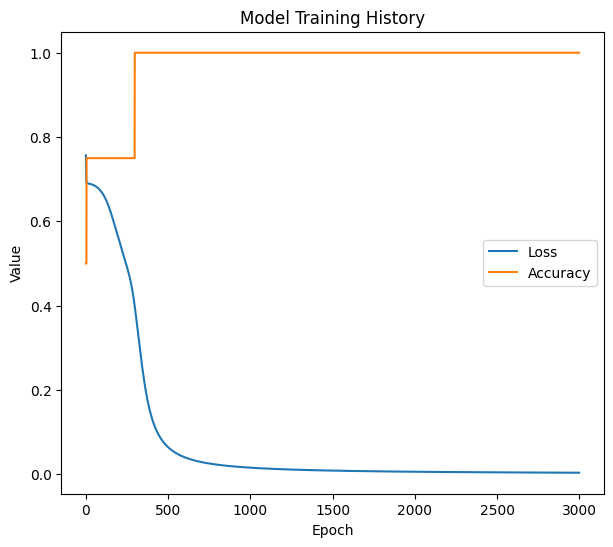

In [38]:
plt.figure(figsize=(7, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Training History')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

In [35]:
high_lr_sgd = optimizers.SGD(learning_rate=1.0)

input_layer = layers.Dense(units=2, input_dim=2, activation='sigmoid')
output_layer = layers.Dense(units=1, activation='sigmoid')

bad_pizza_model = models.Sequential()
bad_pizza_model.add(input_layer)
bad_pizza_model.add(output_layer)
bad_pizza_model.compile(loss='binary_crossentropy', optimizer=high_lr_sgd, metrics=['accuracy'])

bad_pizza_model.summary()

c:\Users\yoann\Documents\Projet AI\introduction-to-deep-learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)